In [3]:
import matplotlib                                  
import matplotlib.font_manager
import matplotlib.pyplot as plt
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['NanumBarunGothic',
 'NanumSquare',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumSquareRound',
 'NanumSquare']

In [116]:
import matplotlib as plot

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [6]:
import pandas as pd
import seaborn as sns

타이타닉 데이터 분석하기

In [80]:
#데이터 속성 및 기술통계량 확인
tai_df = pd.read_csv('/home/piai/바탕화면/2. Big Data 분석/titanic.csv',encoding='EUC-KR')

In [94]:
tai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [145]:
tai_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.713352,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.969135,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
tai_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

변수 분포 확인

<AxesSubplot:ylabel='None'>

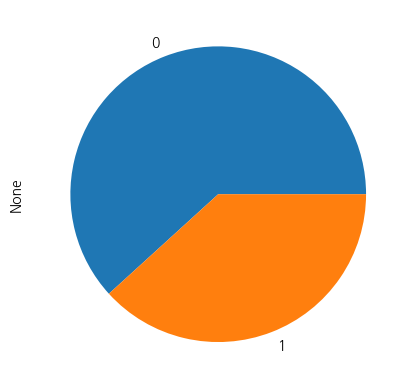

In [242]:
tai_df.groupby(['Survived']).size().plot.pie()

In [243]:
df_count

Sex
female    312
male      577
dtype: int64

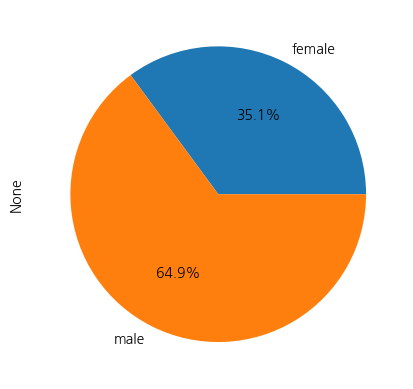

In [241]:
#남녀 분포
df_count = tai_df.groupby(['Sex']).size()
df_count.plot.pie(y='Survived',autopct='%.1f%%')
plt.show()

<AxesSubplot:>

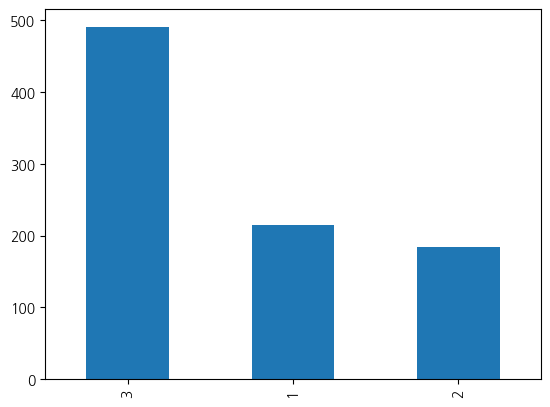

In [148]:
#승객 등급별 분포
tai_df['Pclass'].value_counts().plot.bar()

In [240]:
tai_df['Age'].sum()

26415.17

결측치 제거

In [123]:
tai_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [247]:
#결측치 존재하는 열 삭제
tai_df = tai_df.dropna(axis=1)
#결측치 존재하는 행 삭제
tai_df = tai_df.dropna()
tai_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

이상치 제거

In [252]:
#이상치가 존재할 수 있는 변수 Age,Fare를 이상점 공식 사용해서 제거
for i in list(['Age','Fare']):
    q1 = tai_df[i].quantile(0.25)
    q2 = tai_df[i].quantile(0.5)
    q3 = tai_df[i].quantile(0.75)
    iqr = q3 - q1
    a = tai_df[tai_df[i]>q3+1.5*iqr].index
    tai_df.drop(a,inplace=True)
tai_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


변수간 관계 파악

In [255]:
tai_df = tai_df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

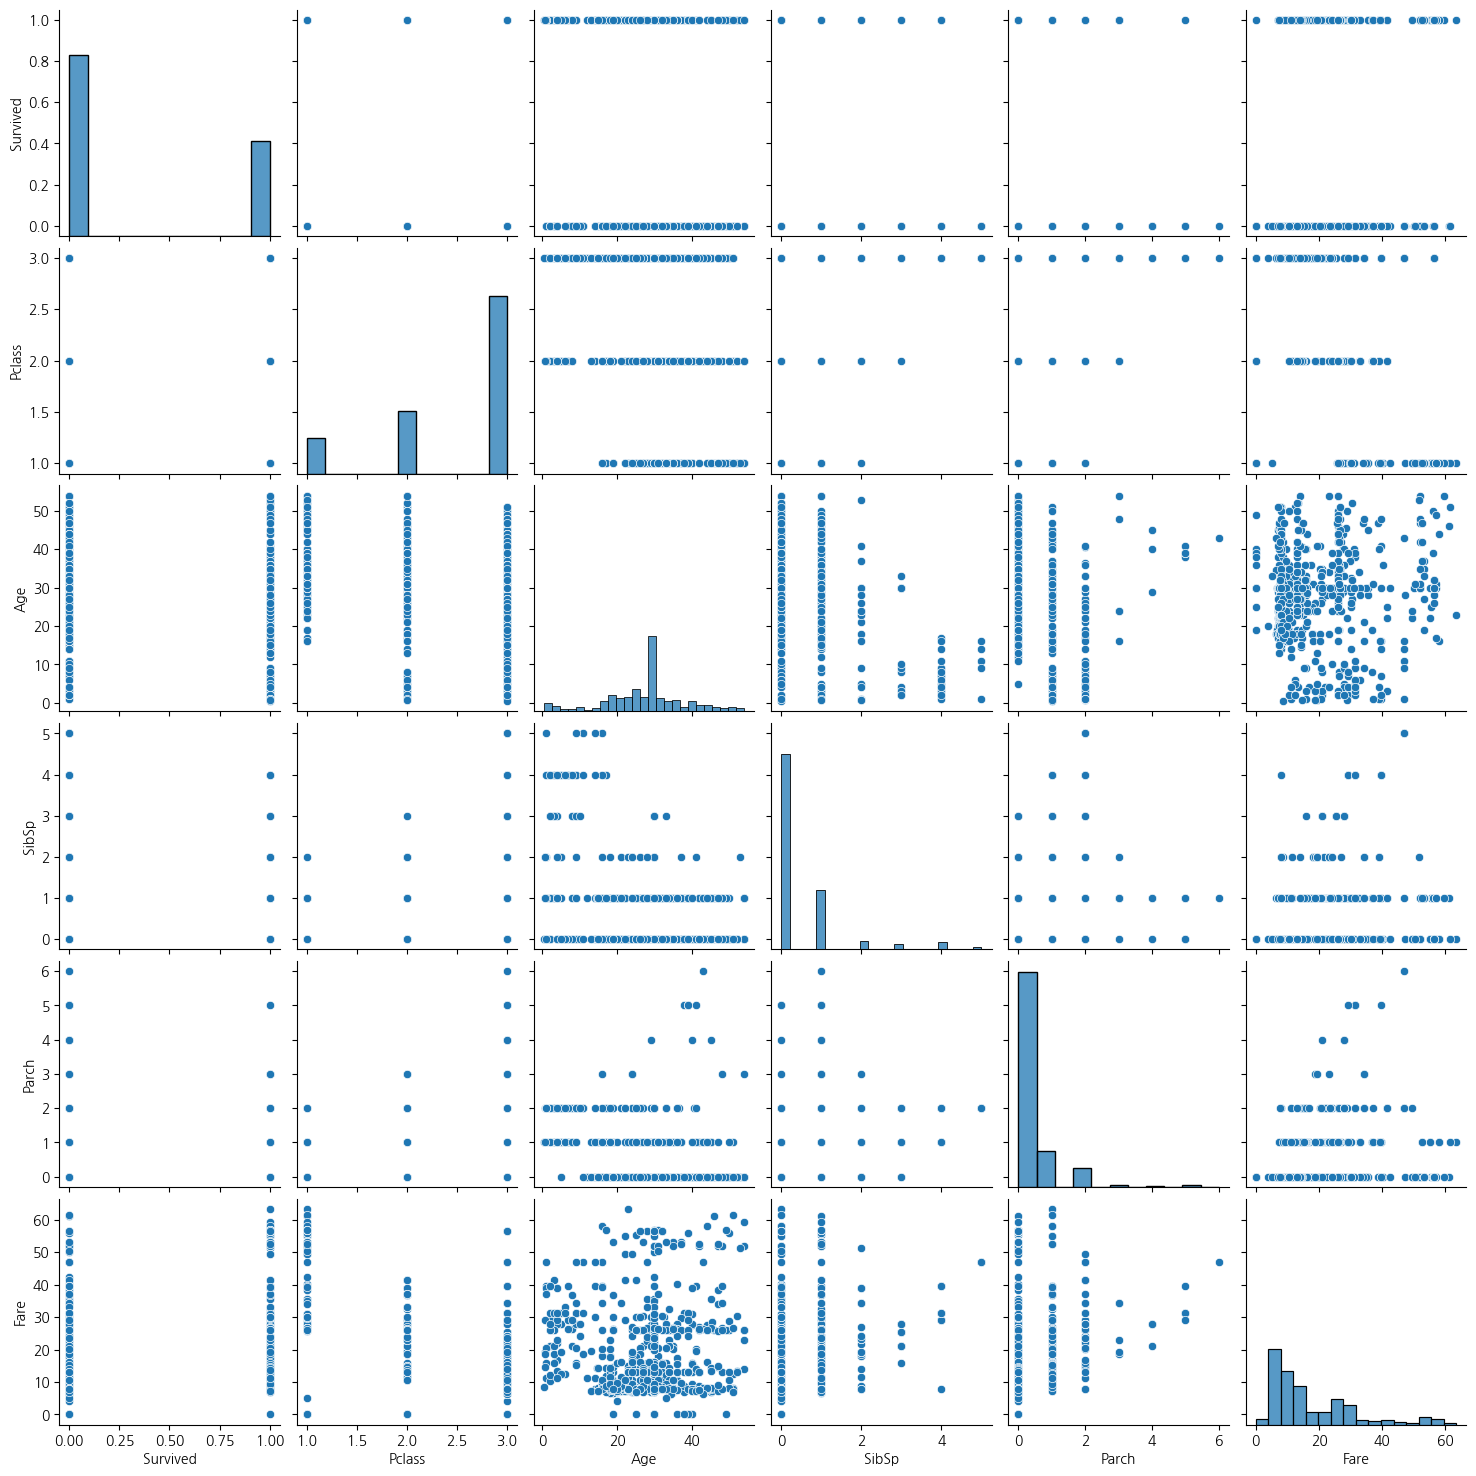

In [256]:
sns.pairplot(tai_df)
#보기 어려움

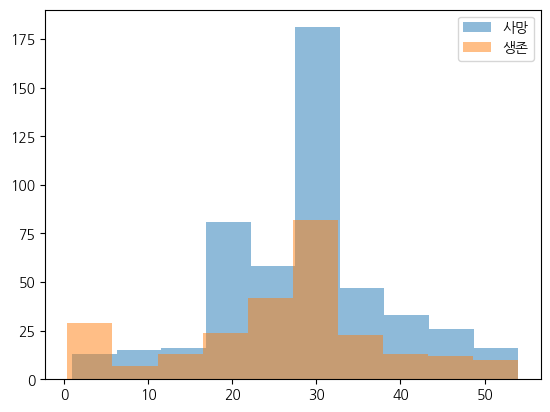

In [261]:
#나이에 따른 생존자 비교
plt.hist(tai_df[tai_df['Survived']==0]['Age'],label = '사망',alpha=0.5)
plt.hist(tai_df[tai_df['Survived']==1]['Age'],label = '생존',alpha=0.5)
plt.legend()

<AxesSubplot:ylabel='None'>

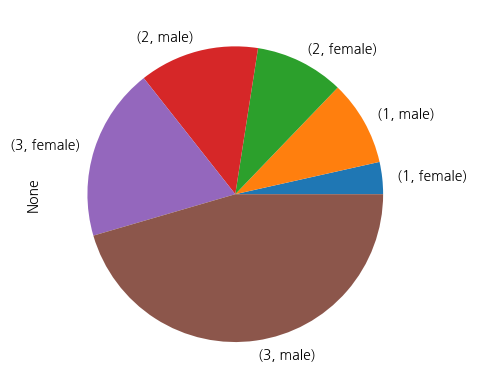

In [263]:
#성별 + 생존자 분석
df_count = tai_df.groupby(['Pclass','Sex']).size()
df_count.plot.pie(y='Survived')

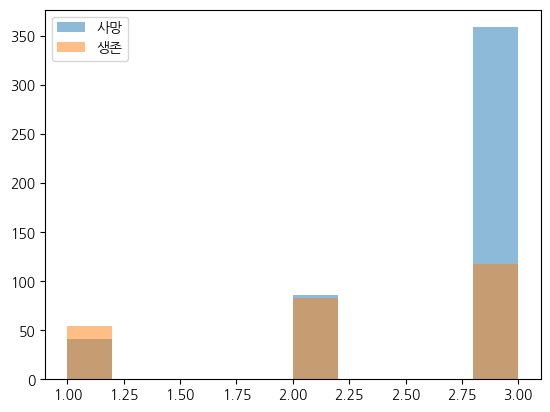

In [264]:
#탑승 등급에 따른 생존자 비교
plt.hist(tai_df[tai_df['Survived']==0]['Pclass'],label = '사망',alpha=0.5)
plt.hist(tai_df[tai_df['Survived']==1]['Pclass'],label = '생존',alpha=0.5)
plt.legend()
#3등급에 타면 거의 죽는다는 사실 파악

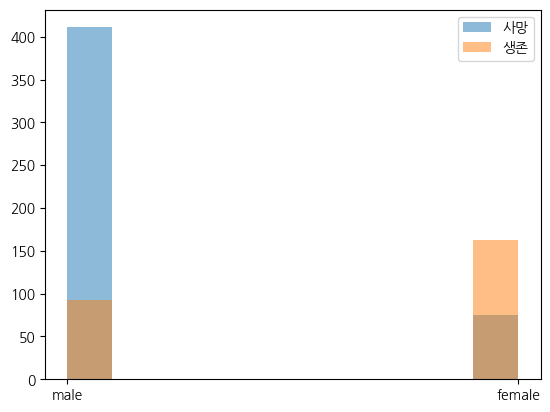

In [265]:
#탑승 등급에 따른 생존자 비교
plt.hist(tai_df[tai_df['Survived']==0]['Sex'],label = '사망',alpha=0.5)
plt.hist(tai_df[tai_df['Survived']==1]['Sex'],label = '생존',alpha=0.5)
plt.legend()
#남자가 더 많이 죽는다는 사실 파악

In [ ]:
#생존에 영향을 미친것이 성별과 승객 등급이라는 사실을 알게됨

기술통계실습

In [228]:
#데이터 읽어와서 필요한 열만 남기기
car_df = pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/mycars.csv")
car_df = car_df[['model','mpg','highway_mileage']]
car_df
#기술 통계치 출력
car_df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                             highway_mileage                             \
                         max           count       mean       std   min   
model                                                                     
4runner 4wd             16.0             6.0  18.833333  1.471960  17.0   
a4                      21.0             7.0  28.285714  1.976047  26.0   
a4 quattro              20.0             8.0  25.750000  1.164965  25.0   
a6 quattro              17.0             3.0  24.000000  1.000000  23.0   
altima                  23.0             6.0  28.666667  2.422120  26.0   
c1500 suburban 2wd      14.0             5.0  17.800000  2.167948  15.0   
camry                   21.0             7.0  28.285714  2.138090  26.0   
camry solara            22.0       

In [230]:
car_df = pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/mycars.csv")
car_df = car_df[['model','automatic']]
car_df

,model,automatic
0,a4,auto
1,a4,manual
2,a4,manual
3,a4,auto
4,a4,auto
...,...,...
229,passat,auto
230,passat,manual
231,passat,auto
232,passat,manual


In [235]:
import numpy as np

In [237]:
#구동방식, 모델에 해 counts, percents, cumulative counts, cumulative percents 계산
for i in car_df.columns:
    count = car_df[i].value_counts().sort_index()
    cumcnt = np.cumsum(count)
    percent = count/sum(count) * 100
    cumpct = np.cumsum(percent)
    count_data = pd.DataFrame({'Count':count,'CumCnt':cumcnt,'Percent':percent,"CumPct":cumpct})
    count_data.columns.name = i
    print(count_data)
    print()

model                   Count  CumCnt   Percent      CumPct
4runner 4wd                 6       6  2.564103    2.564103
a4                          7      13  2.991453    5.555556
a4 quattro                  8      21  3.418803    8.974359
a6 quattro                  3      24  1.282051   10.256410
altima                      6      30  2.564103   12.820513
c1500 suburban 2wd          5      35  2.136752   14.957265
camry                       7      42  2.991453   17.948718
camry solara                7      49  2.991453   20.940171
caravan 2wd                11      60  4.700855   25.641026
civic                       9      69  3.846154   29.487179
corolla                     5      74  2.136752   31.623932
corvette                    5      79  2.136752   33.760684
dakota pickup 4wd           9      88  3.846154   37.606838
durango 4wd                 7      95  2.991453   40.598291
expedition 2wd              3      98  1.282051   41.880342
explorer 4wd                6     104  2

확률분포 실습

In [199]:
from scipy import stats

In [217]:
#정규분포 계산
#평균 175, 표준편차 5
mu = 175 #평균
sigma = 5 #표준편차
x = 180  #나의 키
prob = stats.norm.cdf(x,mu,sigma키 #정규분포 계산
print("나의 키가 {}인 경우에 나는 {}%에 해당한다.".format(x,(1-prob)*100))
#정규분포에서 180 이상의 범위
                      
#평균 12, 표준편차 3
mu = 12
sigma = 3
x = 15
prob = stats.norm.cdf(x,mu,sigma)
print("9km 이상 15km 이하로 달릴 확률은 {}입니다.".format((prob-0.5)*2))
print("15km 이상 달릴 확률은 {}입니다.".format(1-prob))
#T-분포 계산
#자유도 100, t값 2.0
t = 2
df = 100
print("P<=F:",prob)
#카이제곱 계산
#자유도가 8, x^2 값 3
chisq = 2
df = 8
prob =  stats.chi2.cdf(chisq,df)
print("P(X<={}):{}".format(chisq,prob))
#F분포 계산
#자유도가 10, 100, F값이 1.5
f = 1.5
dfnum = 10
dfden = 100
prob = stats.f.cdf(f,dfnum,dfden)
print("P(X<=P):{}".format(prob))
#이항 분포 계산
#n은 5, 불량률은 30%
n = 5
p = 0.3
for i in range(n+1):
    prob = stats.binom.pmf(i,n,p)
    print("불량대수 {}대가 나올 확률은 {}".format(i,prob))

나의 키가 180인 경우에 나는 15.865525393145708%에 해당한다.
9km 이상 15km 이하로 달릴 확률은 0.6826894921370859입니다.
15km 이상 달릴 확률은 0.15865525393145707입니다.
P<=F: 0.8413447460685429
P(X<=2):0.01898815687615381
P(X<=P):0.8495702459436559
불량대수 0대가 나올 확률은 0.16806999999999994
불량대수 1대가 나올 확률은 0.3601499999999999
불량대수 2대가 나올 확률은 0.3086999999999998
불량대수 3대가 나올 확률은 0.1322999999999999
불량대수 4대가 나올 확률은 0.028349999999999986
불량대수 5대가 나올 확률은 0.0024299999999999994
